### import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
from scipy.stats import fisher_exact
from sklearn.metrics import confusion_matrix
import utility
import importlib
import matplotlib.pyplot as plt
pd.set_option('mode.chained_assignment', None)

##### Read gain data

In [2]:
df = pd.read_csv("Gain_calulated_unfiltered_vcf.csv")

In [3]:
df

,Unnamed: 0,Position,CHROM,REF,ALT,population_name,G70_ref_counts,G1410_ref_counts,G2640_ref_counts,G5150_ref_counts,G7530_ref_counts,G10150_ref_counts,G70_alt_counts,G1410_alt_counts,G2640_alt_counts,G5150_alt_counts,G7530_alt_counts,G10150_alt_counts,accumulate_gain
0,0,31,chrVIII,C,A,P3G06,35.0,31.0,59.0,38.0,42.0,56.0,0.0,0.0,0.0,0.0,11.0,0.0,-3.577119
1,1,34,2-micron,G,T,P1E04,74.0,104.0,3.0,0.0,0.0,1.0,0.0,217.0,426.0,323.0,156.0,236.0,0.392871
2,2,34,chrII,G,A,P2C06,4.0,0.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,16.0,12.0,-4.563850
3,3,36,chrIX,C,A,P2F11,24.0,5.0,39.0,2.0,34.0,2.0,0.0,0.0,0.0,0.0,5.0,0.0,-11.012777
4,4,36,chrIX,C,A,P3F11,44.0,1.0,38.0,4.0,18.0,2.0,0.0,0.0,0.0,0.0,9.0,0.0,-11.012777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133533,133533,1525964,chrIV,C,T,P3G10,0.0,0.0,0.0,1.0,2.0,0.0,3.0,5.0,12.0,7.0,18.0,0.0,8.835324
133534,133534,1525964,chrIV,C,T,P3G11,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,6.0,0.0,4.0,0.0,8.835324
133535,133535,1525998,chrIV,T,C,P3B07,0.0,0.0,1.0,1.0,3.0,0.0,2.0,0.0,0.0,1.0,8.0,0.0,-14.496006
133536,133536,1525998,chrIV,T,C,P3B10,0.0,0.0,0.0,4.0,2.0,1.0,0.0,0.0,3.0,2.0,0.0,0.0,-14.496006


##### Read media data

In [4]:
df_media = pd.read_excel("../data/media.xlsx", sheet_name="media")
df_media = df_media.rename(columns={'platewell': 'population_name'})
df_media

,population_name,Plate,Strain
0,P1B02,YPD 30°C,a
1,P1B04,YPD 30°C,a
2,P1B07,YPD 30°C,diploid
3,P1B11,YPD 30°C,alpha
4,P1C02,YPD 30°C,a
...,...,...,...
84,P3G05,SC 37°C,a
85,P3G06,SC 37°C,a
86,P3G09,SC 37°C,diploid
87,P3G10,SC 37°C,diploid


##### calculate sum of allele count across all generation

In [5]:
df["sum of alt AC"] = df['G70_alt_counts'] + df['G1410_alt_counts'] + \
df['G2640_alt_counts'] + df['G5150_alt_counts'] + df['G7530_alt_counts'] + df['G10150_alt_counts']
df

,Unnamed: 0,Position,CHROM,REF,ALT,population_name,G70_ref_counts,G1410_ref_counts,G2640_ref_counts,G5150_ref_counts,G7530_ref_counts,G10150_ref_counts,G70_alt_counts,G1410_alt_counts,G2640_alt_counts,G5150_alt_counts,G7530_alt_counts,G10150_alt_counts,accumulate_gain,sum of alt AC
0,0,31,chrVIII,C,A,P3G06,35.0,31.0,59.0,38.0,42.0,56.0,0.0,0.0,0.0,0.0,11.0,0.0,-3.577119,11.0
1,1,34,2-micron,G,T,P1E04,74.0,104.0,3.0,0.0,0.0,1.0,0.0,217.0,426.0,323.0,156.0,236.0,0.392871,1358.0
2,2,34,chrII,G,A,P2C06,4.0,0.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,16.0,12.0,-4.563850,28.0
3,3,36,chrIX,C,A,P2F11,24.0,5.0,39.0,2.0,34.0,2.0,0.0,0.0,0.0,0.0,5.0,0.0,-11.012777,5.0
4,4,36,chrIX,C,A,P3F11,44.0,1.0,38.0,4.0,18.0,2.0,0.0,0.0,0.0,0.0,9.0,0.0,-11.012777,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133533,133533,1525964,chrIV,C,T,P3G10,0.0,0.0,0.0,1.0,2.0,0.0,3.0,5.0,12.0,7.0,18.0,0.0,8.835324,45.0
133534,133534,1525964,chrIV,C,T,P3G11,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,6.0,0.0,4.0,0.0,8.835324,10.0
133535,133535,1525998,chrIV,T,C,P3B07,0.0,0.0,1.0,1.0,3.0,0.0,2.0,0.0,0.0,1.0,8.0,0.0,-14.496006,11.0
133536,133536,1525998,chrIV,T,C,P3B10,0.0,0.0,0.0,4.0,2.0,1.0,0.0,0.0,3.0,2.0,0.0,0.0,-14.496006,5.0


##### Add allele switch column

In [6]:
df["allele switch"] = df["REF"]+ "->" + df["ALT"]
df.head()

,Unnamed: 0,Position,CHROM,REF,ALT,population_name,G70_ref_counts,G1410_ref_counts,G2640_ref_counts,G5150_ref_counts,...,G10150_ref_counts,G70_alt_counts,G1410_alt_counts,G2640_alt_counts,G5150_alt_counts,G7530_alt_counts,G10150_alt_counts,accumulate_gain,sum of alt AC,allele switch
0,0,31,chrVIII,C,A,P3G06,35.0,31.0,59.0,38.0,...,56.0,0.0,0.0,0.0,0.0,11.0,0.0,-3.577119,11.0,C->A
1,1,34,2-micron,G,T,P1E04,74.0,104.0,3.0,0.0,...,1.0,0.0,217.0,426.0,323.0,156.0,236.0,0.392871,1358.0,G->T
2,2,34,chrII,G,A,P2C06,4.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,16.0,12.0,-4.563850,28.0,G->A
3,3,36,chrIX,C,A,P2F11,24.0,5.0,39.0,2.0,...,2.0,0.0,0.0,0.0,0.0,5.0,0.0,-11.012777,5.0,C->A
4,4,36,chrIX,C,A,P3F11,44.0,1.0,38.0,4.0,...,2.0,0.0,0.0,0.0,0.0,9.0,0.0,-11.012777,9.0,C->A


##### Merge gain and media dataset based on population name

In [7]:
df_with_strain_media = pd.merge(df, df_media, on="population_name", how="left")
df_with_strain_media.head()

,Unnamed: 0,Position,CHROM,REF,ALT,population_name,G70_ref_counts,G1410_ref_counts,G2640_ref_counts,G5150_ref_counts,...,G1410_alt_counts,G2640_alt_counts,G5150_alt_counts,G7530_alt_counts,G10150_alt_counts,accumulate_gain,sum of alt AC,allele switch,Plate,Strain
0,0,31,chrVIII,C,A,P3G06,35.0,31.0,59.0,38.0,...,0.0,0.0,0.0,11.0,0.0,-3.577119,11.0,C->A,SC 37°C,a
1,1,34,2-micron,G,T,P1E04,74.0,104.0,3.0,0.0,...,217.0,426.0,323.0,156.0,236.0,0.392871,1358.0,G->T,YPD 30°C,a
2,2,34,chrII,G,A,P2C06,4.0,0.0,1.0,0.0,...,0.0,0.0,0.0,16.0,12.0,-4.563850,28.0,G->A,SC 30°C,a
3,3,36,chrIX,C,A,P2F11,24.0,5.0,39.0,2.0,...,0.0,0.0,0.0,5.0,0.0,-11.012777,5.0,C->A,SC 30°C,alpha
4,4,36,chrIX,C,A,P3F11,44.0,1.0,38.0,4.0,...,0.0,0.0,0.0,9.0,0.0,-11.012777,9.0,C->A,SC 37°C,alpha


##### Convert the data to consider the mutation of all generation of every population format

In [8]:
all_mutation = pd.DataFrame()
gen_list = ['G70_alt_counts', 'G1410_alt_counts', 'G2640_alt_counts', 'G5150_alt_counts', 'G7530_alt_counts',
            'G10150_alt_counts']

for i in gen_list:
    new_df_tmp = pd.DataFrame()
    new_df = df[df.loc[:, i]!=0]
    new_df_tmp = new_df[['CHROM', 'Position', 'allele switch', 'population_name']]
    new_df_tmp.loc[:, "generation"] = i
    new_df_tmp.loc[:, "AG"] = new_df.loc[:, "accumulate_gain"]
    new_df_tmp.loc[:, "allele count"] = new_df.loc[:, i]
    all_mutation = pd.concat([all_mutation, new_df_tmp], axis = 0)
    
all_mutation.reset_index(inplace=True, drop=True)
all_mutation['generation_number'] = all_mutation['generation'].str.extract(r'(\d+)').astype(int)

In [9]:
all_mutation # The all_mutation dataframe contain generation and population wise accumulated gain

,CHROM,Position,allele switch,population_name,generation,AG,allele count,generation_number
0,chrX,66,C->T,P1C11,G70_alt_counts,6.067923,7.0,70
1,chrX,69,T->A,P1C11,G70_alt_counts,-4.705100,7.0,70
2,chrX,73,C->T,P1C11,G70_alt_counts,3.963808,7.0,70
3,chrX,73,C->T,P2B04,G70_alt_counts,3.963808,5.0,70
4,chrX,74,T->C,P1B02,G70_alt_counts,-2.479826,5.0,70
...,...,...,...,...,...,...,...,...
500926,chrIV,1525964,C->T,P3D10,G10150_alt_counts,8.835324,4.0,10150
500927,chrIV,1525964,C->T,P3D11,G10150_alt_counts,8.835324,2.0,10150
500928,chrIV,1525964,C->T,P3E08,G10150_alt_counts,8.835324,2.0,10150
500929,chrIV,1525964,C->T,P3F09,G10150_alt_counts,8.835324,6.0,10150


##### prepare pivot table for population name vs generation for accumulated gain when using median as aggregate function 

In [10]:
pivot_table_median = all_mutation.pivot_table(index='population_name', columns='generation', aggfunc='median', values = "AG")

In [11]:
pivot_table_median

generation,G10150_alt_counts,G1410_alt_counts,G2640_alt_counts,G5150_alt_counts,G70_alt_counts,G7530_alt_counts
population_name,,,,,,
P1B02,-1.016953,-1.346143,-1.208955,-1.062441,-1.594079,-1.118219
P1B03,-1.157531,-1.253406,-1.296853,-1.431549,-1.826906,-1.178284
P1B04,-0.902789,-0.796355,-1.124722,-0.919613,-1.413609,-0.912627
P1B07,-1.496398,-1.610997,-1.525015,-1.571824,-1.604118,-1.614365
P1B11,-0.919613,-1.208955,-1.604814,-1.021440,-1.610997,-1.123226
...,...,...,...,...,...,...
P3G05,-0.411016,-1.509460,-1.283271,-1.345582,-1.872666,-0.476541
P3G06,-0.692120,-1.310846,-1.265002,-0.963192,-1.377809,-0.910397
P3G09,-1.007506,-1.343901,-1.496278,-1.345582,-1.788013,-1.265002


##### plot heatmap for population name vs generation for accumulated gain when using median as aggregate function

###### It shows the heatmap of median accumulated gain, where the row indicate a population and column indicate generation.

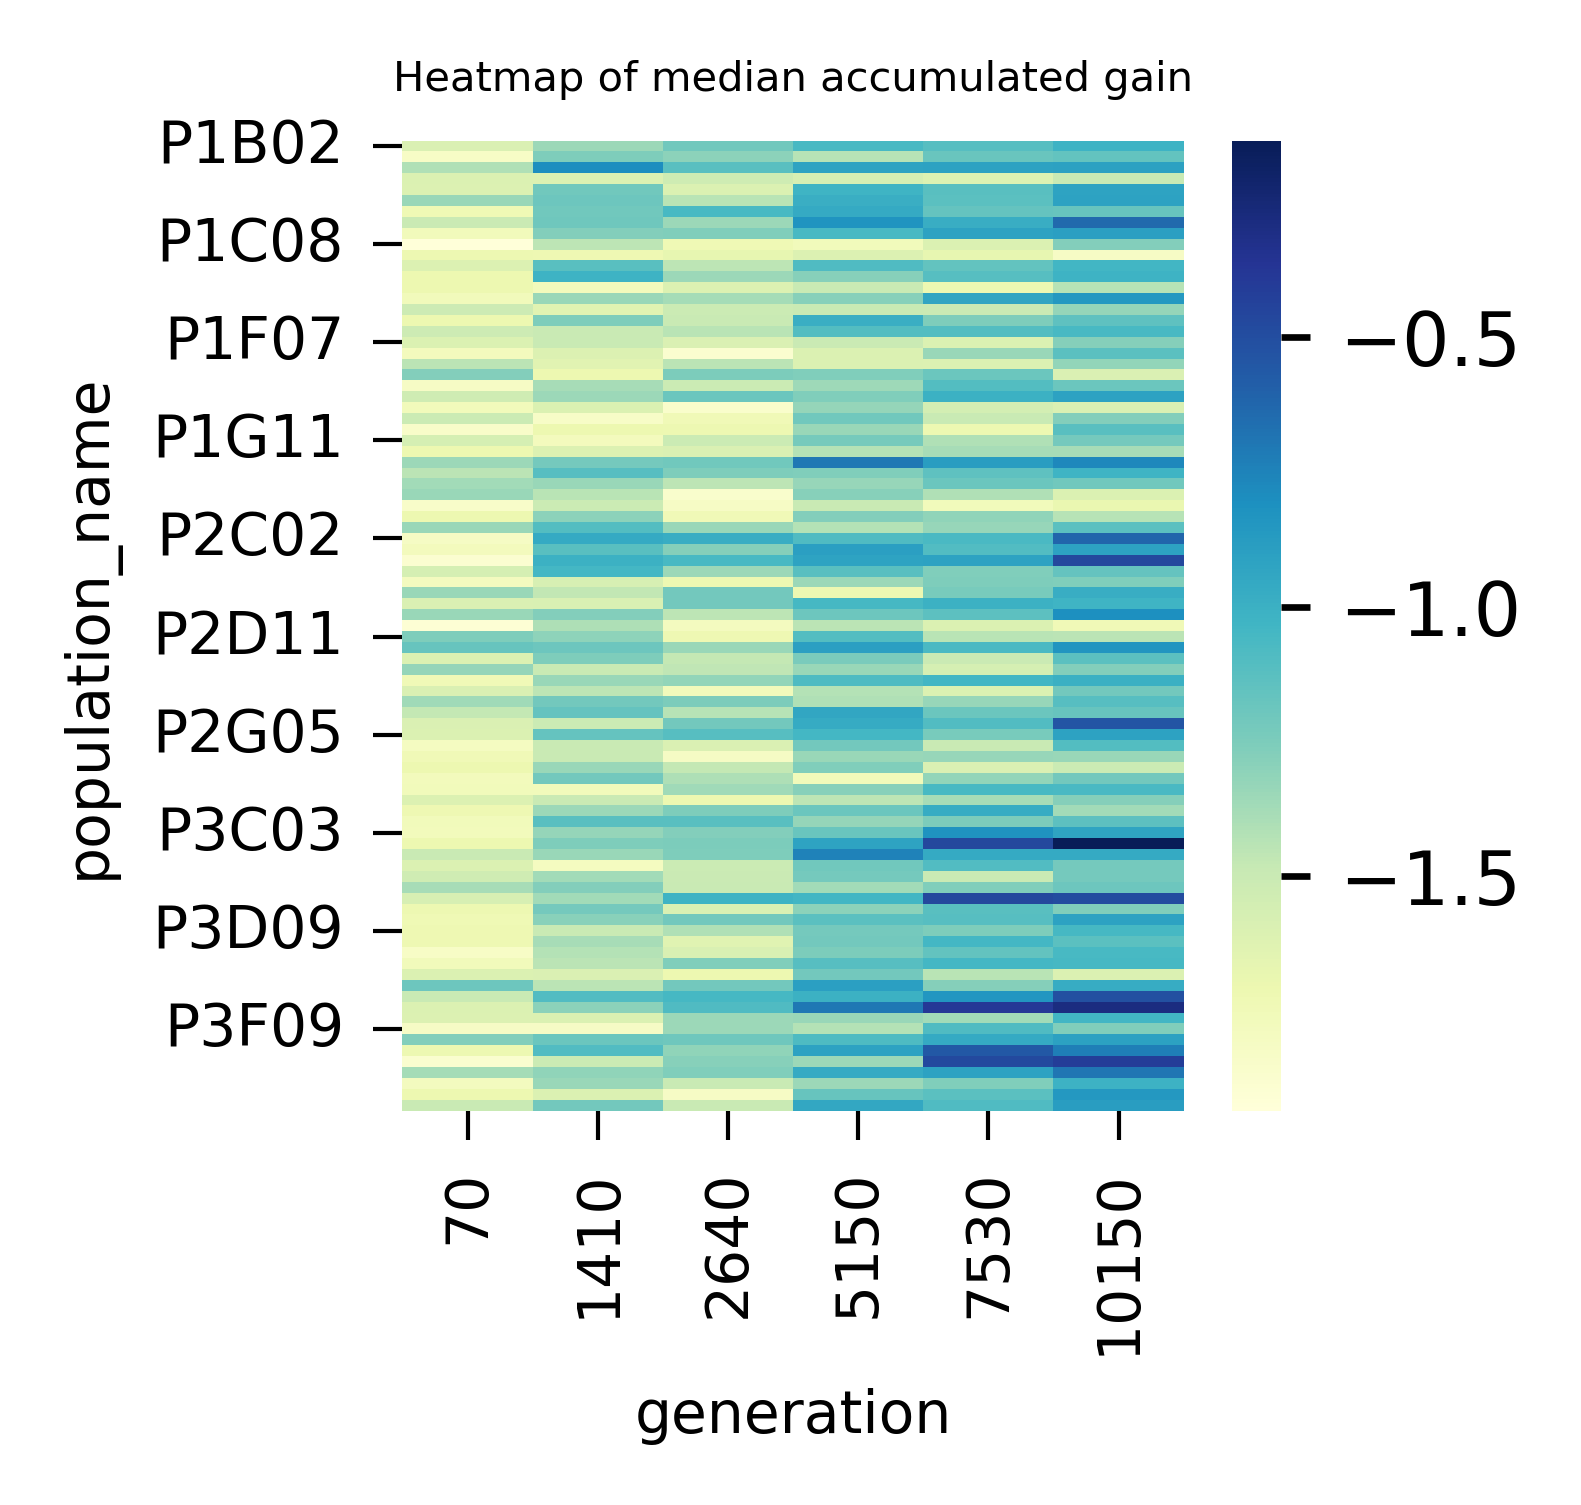

In [12]:
fig, ax = plt.subplots(1, 1, dpi = 600, figsize =(2.1, 2.1))
heatmap_median = sns.heatmap(pivot_table_median[['G70_alt_counts', 'G1410_alt_counts', 'G2640_alt_counts', 'G5150_alt_counts', 'G7530_alt_counts', 'G10150_alt_counts']], cmap='YlGnBu', ax=ax, label="median")
ax = utility.custom_figure_axis(ax, fontsize=7, show_ticks = True)
ax.set_title("Heatmap of median accumulated gain", fontsize=5)
custom_labels = ["70", "1410", "2640", "5150", "7530", "10150"]
ax.set_xticklabels(custom_labels)
cbar = heatmap_median.collections[0].colorbar
cbar.ax.tick_params(labelsize=9)
# plt.savefig("yeast mean of accumulated gain in population vs generation.pdf", dpi = 600, bbox_inches="tight")

##### Allele switch vs accumulated gain (unique mutation)

###### It shows the box plot of accumulated gain for every possible allele change.

In [13]:
allele_switch_group1 = ['C->G','A->C','A->T','T->G','G->C','T->A', 'C->A',  'G->T'] # Transversion group
allele_switch_group2 = ['G->A', 'C->T', 'A->G','T->C'] # Transition group
df_allele_switch_group1 = df[df["allele switch"].isin(allele_switch_group1)]
df_allele_switch_group2 = df[df["allele switch"].isin(allele_switch_group2)]
formatted_p = "{:.2e}".format(utility.man_whiteney(df_allele_switch_group2['accumulate_gain'], df_allele_switch_group1['accumulate_gain']))

p_value = utility.man_whiteney(df_allele_switch_group2['accumulate_gain'], df_allele_switch_group1['accumulate_gain'])
print("The one sided greater p value between Transition group and Transversion group is : ", p_value)

The one sided greater p value between Transition group and Transversion group is :  1.0


/home/abhishekh/anaconda3/envs/amr/lib/python3.10/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


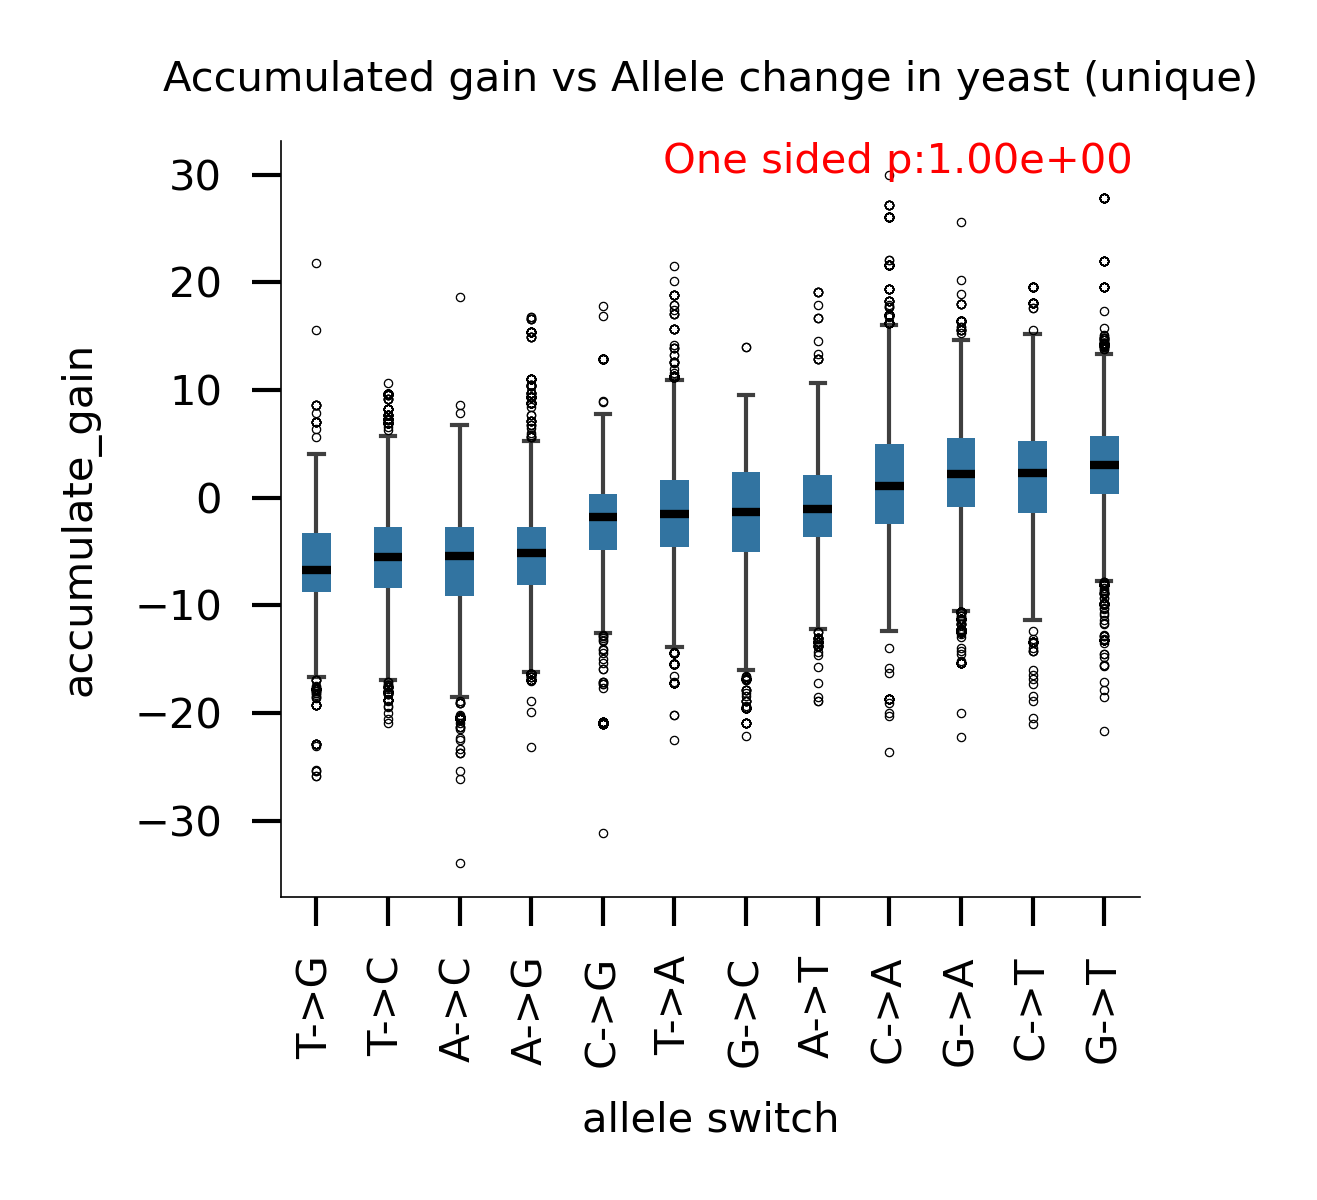

In [14]:
fig, ax = plt.subplots(1, 1, dpi = 600, figsize =(2.1,2.1))
ax = utility.box_plot(data= df, x = 'allele switch', y = 'accumulate_gain', ax = ax)
ax = utility.custom_figure_axis(ax, fontsize=5, show_ticks = True)
ax.set_title("Accumulated gain vs Allele change in yeast (unique)", fontsize=5)
offset=0.1
formatted_p = "{:.2e}".format(utility.man_whiteney(df_allele_switch_group2['accumulate_gain'], df_allele_switch_group1['accumulate_gain']))
ax.text((max(ax.get_xlim()) - offset), (max(ax.get_ylim()) - offset), "One sided p:" + formatted_p, fontsize=5, color='red', ha='right', va='top')
plt.tight_layout()
# plt.savefig("unfiltered accumulated gain vs allele change in yeast unique mutation.pdf", dpi = 600, bbox_inches="tight")

##### statistical test

In [15]:
ag_binary = np.where(df[ 'accumulate_gain'] > 0, 1, 0) # binarize the accumulated gain with zero as cut off
ac_binary = np.where(df["sum of alt AC"] > np.median(df["sum of alt AC"]), 1, 0) # binarize the sum of allele count with median as cut off
cm = confusion_matrix(ac_binary, ag_binary)

confusion_df = pd.DataFrame(cm, columns=['g_neg', 'g_pos'], index=['ac_low', 'ac_high']) # prepare the confusion matrix

odds_ratio, p_value_fisher = fisher_exact(np.array(confusion_df))

print("The confusion matrix is: \n", confusion_df)
# print("The ratio of High allele count/ low allele count for low accumulated gain is: ", cm[1][0]/cm[0][0])
# print("The ratio of High allele count/ low allele count for high accumulated gain is: ", cm[1][1]/cm[0][1])
# print("The ratio of pos gain/ neg gain for low allele count is: ", cm[0][1]/cm[0][0])
# print("The ratio of pos gain/ neg gain for high allele count is: ", cm[1][1]/cm[1][0])
print("Fisher's exact test p-value:", p_value_fisher)
# print("Hypergeometric test p-value:", p_value_hypergeom)

The confusion matrix is: 
          g_neg  g_pos
ac_low   40477  27694
ac_high  36859  28508
Fisher's exact test p-value: 2.18424819264883e-28


In [16]:
all_mutation

,CHROM,Position,allele switch,population_name,generation,AG,allele count,generation_number
0,chrX,66,C->T,P1C11,G70_alt_counts,6.067923,7.0,70
1,chrX,69,T->A,P1C11,G70_alt_counts,-4.705100,7.0,70
2,chrX,73,C->T,P1C11,G70_alt_counts,3.963808,7.0,70
3,chrX,73,C->T,P2B04,G70_alt_counts,3.963808,5.0,70
4,chrX,74,T->C,P1B02,G70_alt_counts,-2.479826,5.0,70
...,...,...,...,...,...,...,...,...
500926,chrIV,1525964,C->T,P3D10,G10150_alt_counts,8.835324,4.0,10150
500927,chrIV,1525964,C->T,P3D11,G10150_alt_counts,8.835324,2.0,10150
500928,chrIV,1525964,C->T,P3E08,G10150_alt_counts,8.835324,2.0,10150
500929,chrIV,1525964,C->T,P3F09,G10150_alt_counts,8.835324,6.0,10150


##### Accumulated gain vs generation

###### It shows the line plot of median of accumulated gain vs generation where the the shaaded region indicate 95% confidence interval.

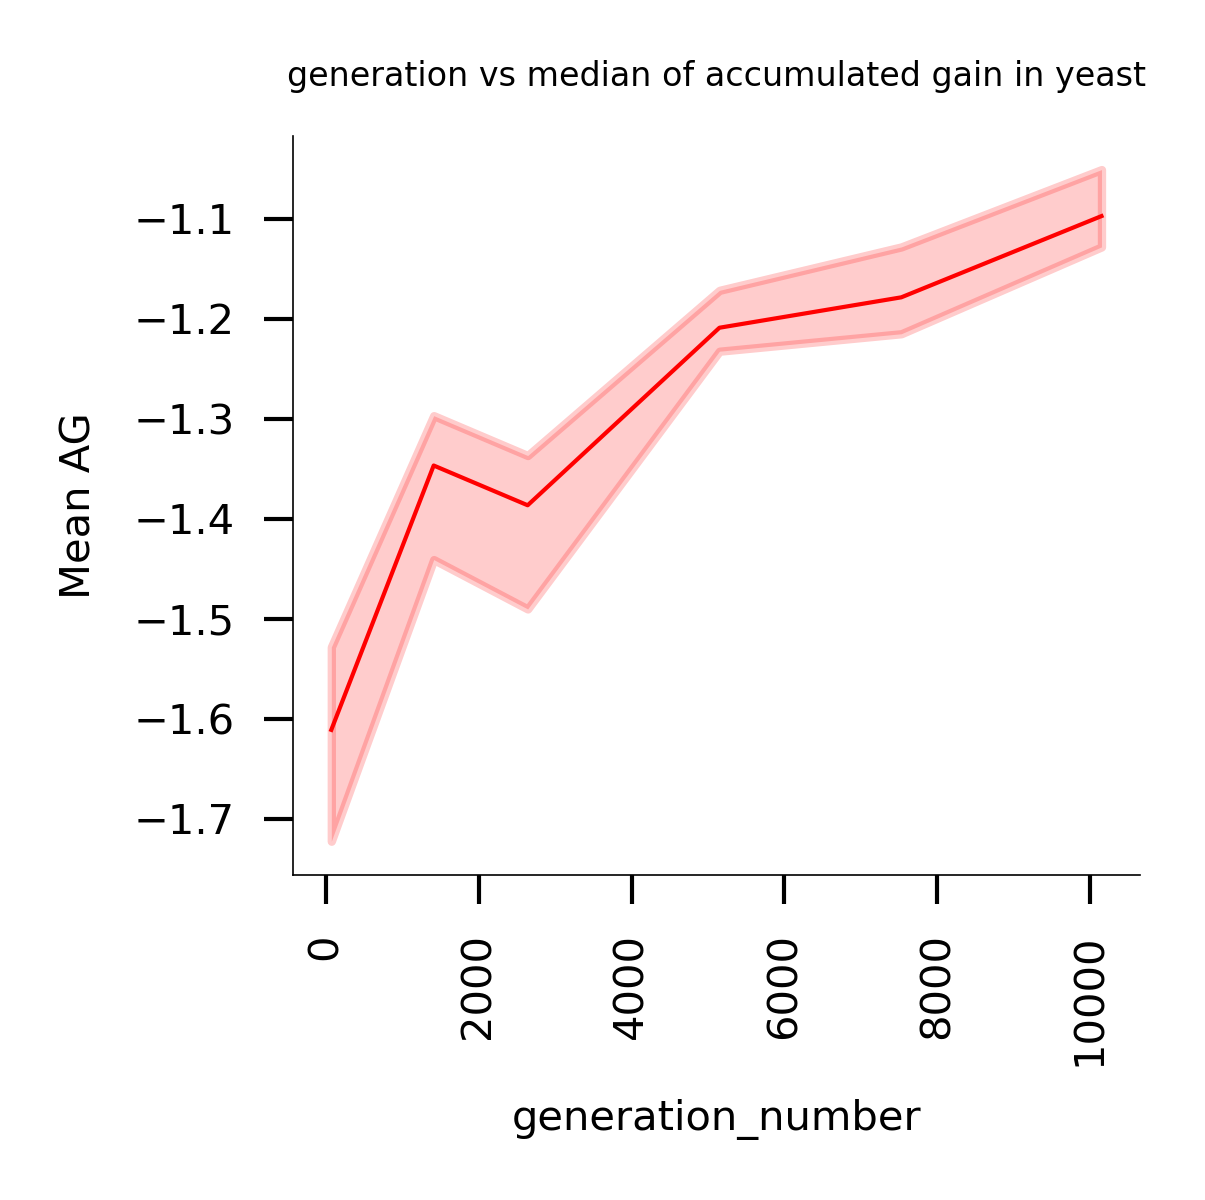

In [17]:
fig, ax = plt.subplots(1, 1 , dpi = 600, figsize = (2.1, 2.1))
ax = sns.lineplot(data = all_mutation, x = "generation_number", y = "AG", ax = ax, color="red", lw=0.5, estimator='median')
ax = utility.custom_figure_axis(ax, fontsize=5, show_ticks = True)
ax.set_ylabel("Median AG")
ax.set_title("generation vs median of accumulated gain in yeast", fontsize=4)
plt.tight_layout()
# plt.savefig("generation vs ag in yeast.pdf", dpi = 600)

##### merge all_mutation with media data

In [18]:
all_mutation_with_media = pd.merge(all_mutation, df_media, on = 'population_name', how='left')
all_mutation_with_media

,CHROM,Position,allele switch,population_name,generation,AG,allele count,generation_number,Plate,Strain
0,chrX,66,C->T,P1C11,G70_alt_counts,6.067923,7.0,70,YPD 30°C,alpha
1,chrX,69,T->A,P1C11,G70_alt_counts,-4.705100,7.0,70,YPD 30°C,alpha
2,chrX,73,C->T,P1C11,G70_alt_counts,3.963808,7.0,70,YPD 30°C,alpha
3,chrX,73,C->T,P2B04,G70_alt_counts,3.963808,5.0,70,SC 30°C,a
4,chrX,74,T->C,P1B02,G70_alt_counts,-2.479826,5.0,70,YPD 30°C,a
...,...,...,...,...,...,...,...,...,...,...
500926,chrIV,1525964,C->T,P3D10,G10150_alt_counts,8.835324,4.0,10150,SC 37°C,diploid
500927,chrIV,1525964,C->T,P3D11,G10150_alt_counts,8.835324,2.0,10150,SC 37°C,alpha
500928,chrIV,1525964,C->T,P3E08,G10150_alt_counts,8.835324,2.0,10150,SC 37°C,diploid
500929,chrIV,1525964,C->T,P3F09,G10150_alt_counts,8.835324,6.0,10150,SC 37°C,diploid


In [19]:
# all_mutation_with_media

##### Divide the allele count in quantile wise accumulated gain (Duplicate mutation)

In [20]:
lst_quantile_accumulated_gain_vs_allele, lst_quantile_accumulated_gain_vs_allele_only, lst_quantile_accumulated_gain_vs_allele_median =  utility.return_data_quantile_wise(all_mutation, column_name ="AG")
ag_quantile_wise_allele_count = utility.return_quantile_wise_allele_count(lst_quantile_accumulated_gain_vs_allele, column_name="AG", ignore_label_column =True)

/home/abhishekh/oligo with final pckage/yeast/scripts/utility.py:153: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_tmp_full = pd.concat([df_tmp_full, df_tmp])


##### Box plot of log10(AC) median vs quantile of acumulated gain (Duplicate mutation)

###### The top figure shows the box plot of log10(Allele count) vs quantile wise accumulated gain. The quantile of AG is formed with the step size of 5%. The buttom figure shows the median of log10(AC) vs quantile of AG (5% step size). The shaded area indicate the 95% confidence interval.

/home/abhishekh/anaconda3/envs/amr/lib/python3.10/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(-0.4166666666666785, 0.5, 'Median of log10(AC)')

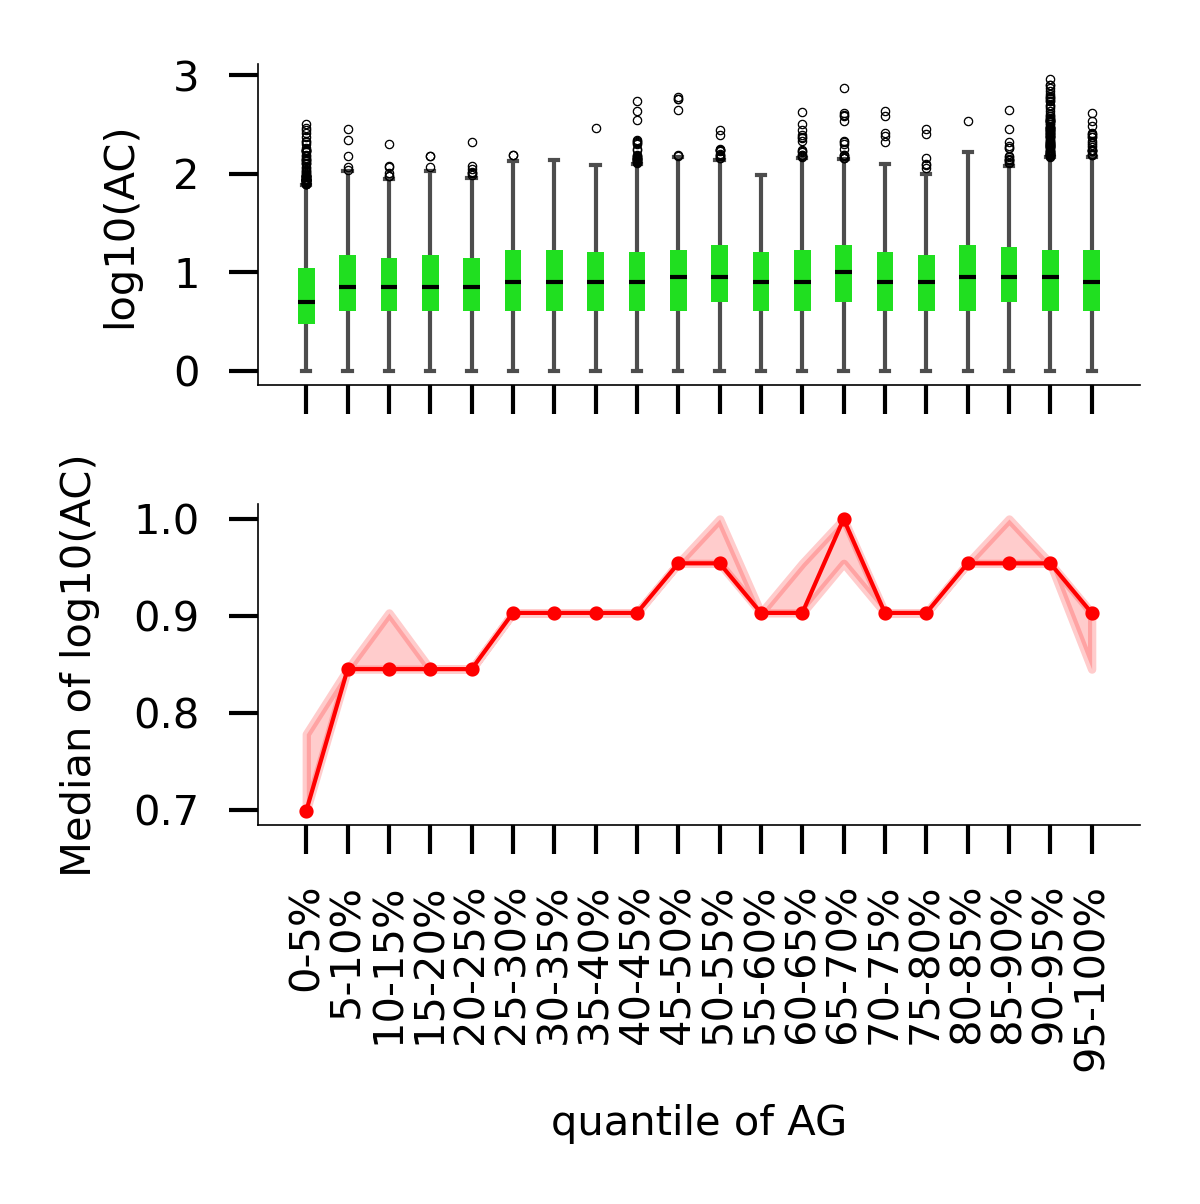

In [21]:
fig, ax = plt.subplots(2, 1 , dpi = 600, figsize = (2.1, 2.1), sharex=True)
ax = utility.plot_ac_vs_column(ax=ax, data = ag_quantile_wise_allele_count, lst_quantile_dataframe_column_name_median = lst_quantile_accumulated_gain_vs_allele_median, show_ticks = True, fontsize=5, column_name = "AG")
# ax[0].set_title("log10(AC) vs quantile of AG", fontsize=5)
# formatted_p = utility.return_quantile_wise_pvalue(lst_quantile_accumulated_gain_vs_allele);
# ax[0].text((max(ax[0].get_xlim()) - offset), (max(ax[0].get_ylim()) - offset), "One sided p:" + formatted_p, fontsize=3, color='red', ha='right', va='top')
ax[0].set_yticks(np.arange(0, 3.1, 1))
ax[1].set_yticks(np.arange(0.7, 1, 0.1))
ax[1].set_ylabel("Median of log10(AC)")
# plt.savefig("unfiltered yeast log10(AC) vs quantile wise AG lineplot.pdf", dpi = 600, bbox_inches="tight")

##### The median line plot of accumulated gain vs strain for different plates (Unique mutation)

/home/abhishekh/anaconda3/envs/amr/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/abhishekh/anaconda3/envs/amr/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/abhishekh/anaconda3/envs/amr/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


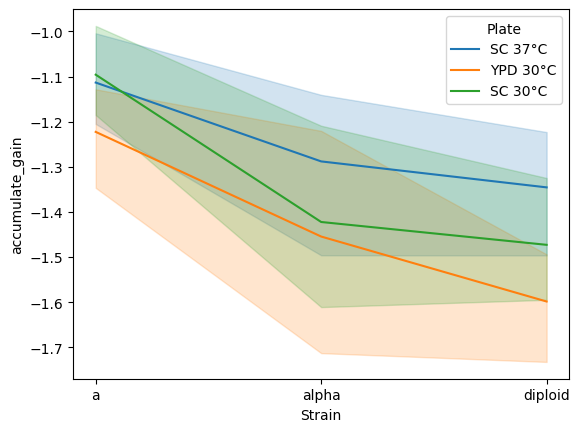

In [22]:
sns.lineplot(df_with_strain_media, y =  'accumulate_gain', x = 'Strain', hue = 'Plate', estimator='median');